In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

import warnings
warnings.filterwarnings('ignore')

/Users/gregoryklose/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data/updated_merged_df')

In [3]:
df.head()

,Unnamed: 0,incident_date,priority,time_phone_pickup,disposition,council_district,census_county_code,census_tract,census_block,census_geoID,...,Day_of_week (int),Day_of_week (name),Hour,Hour (10-23),Hour (0-9),incident_ID,time_incident_closed,time_unit_arrived,Lat,Long
0,0,2012-01-01 00:00:00,4,2011-12-31 20:32:54,ATCEMS Transport,9,453,1100,1118,484530011001118,...,5,Saturday,20,1,0,1,2012-01-01 03:40:39,2012-01-01 03:03:07,30.266295,-97.742436
1,1,2012-01-01 00:00:00,4,2012-01-01 00:03:46,Patient Refusal,5,453,2428,1003,484530024281003,...,6,Sunday,0,0,1,2,2012-01-01 01:21:12,2012-01-01 00:35:56,30.138892,-97.781719
2,2,2012-01-01 00:00:00,4,2012-01-01 00:08:43,No Patient / False Alarm,9,453,1100,1080,484530011001080,...,6,Sunday,0,0,1,3,2012-01-01 00:11:29,NaN,30.266295,-97.742436
3,3,2012-01-01 00:00:00,2,2012-01-01 00:11:47,Patient Refusal,3,453,2314,2010,484530023142010,...,6,Sunday,0,0,1,4,2012-01-01 01:03:06,2012-01-01 00:17:22,30.224696,-97.715512
4,4,2012-01-01 00:00:00,3,2012-01-01 00:16:14,ATCEMS Transport,2,453,2430,1019,484530024301019,...,6,Sunday,0,0,1,5,2012-01-01 01:09:11,2012-01-01 00:24:58,30.171708,-97.755044


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,incident_date,priority,time_phone_pickup,disposition,council_district,census_county_code,census_tract,census_block,census_geoID,FIPS_geoID,...,Day_of_week (int),Day_of_week (name),Hour,Hour (10-23),Hour (0-9),incident_ID,time_incident_closed,time_unit_arrived,Lat,Long
0,2012-01-01 00:00:00,4,2011-12-31 20:32:54,ATCEMS Transport,9,453,1100,1118,484530011001118,48453001100,...,5,Saturday,20,1,0,1,2012-01-01 03:40:39,2012-01-01 03:03:07,30.266295,-97.742436
1,2012-01-01 00:00:00,4,2012-01-01 00:03:46,Patient Refusal,5,453,2428,1003,484530024281003,48453002428,...,6,Sunday,0,0,1,2,2012-01-01 01:21:12,2012-01-01 00:35:56,30.138892,-97.781719
2,2012-01-01 00:00:00,4,2012-01-01 00:08:43,No Patient / False Alarm,9,453,1100,1080,484530011001080,48453001100,...,6,Sunday,0,0,1,3,2012-01-01 00:11:29,NaN,30.266295,-97.742436
3,2012-01-01 00:00:00,2,2012-01-01 00:11:47,Patient Refusal,3,453,2314,2010,484530023142010,48453002314,...,6,Sunday,0,0,1,4,2012-01-01 01:03:06,2012-01-01 00:17:22,30.224696,-97.715512
4,2012-01-01 00:00:00,3,2012-01-01 00:16:14,ATCEMS Transport,2,453,2430,1019,484530024301019,48453002430,...,6,Sunday,0,0,1,5,2012-01-01 01:09:11,2012-01-01 00:24:58,30.171708,-97.755044


## Plot increasing year over year incidents

In [6]:
# Remove year 2011
df = df[df['Year'] != 2011]

In [7]:
df_years = df.groupby('Year')[['incident_ID']].count().reset_index()

In [8]:
df_years

,Year,incident_ID
0,2012,96717
1,2013,98038
2,2014,103304
3,2015,110608
4,2016,111119
5,2017,94139


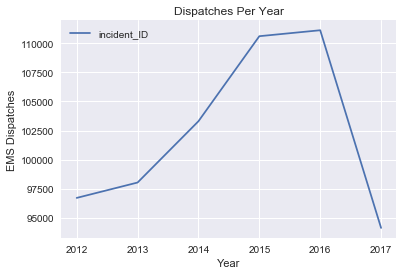

In [9]:
df_years.plot(x='Year',y='incident_ID')
plt.ylabel('EMS Dispatches')
plt.title('Dispatches Per Year')
plt.show()

## Plot incidents by day of week

In [10]:
df.columns

Index(['incident_date', 'priority', 'time_phone_pickup', 'disposition',
       'council_district', 'census_county_code', 'census_tract',
       'census_block', 'census_geoID', 'FIPS_geoID', 'census_block_name',
       'Year', 'Month', 'Day', 'Day_of_week (int)', 'Day_of_week (name)',
       'Hour', 'Hour (10-23)', 'Hour (0-9)', 'incident_ID',
       'time_incident_closed', 'time_unit_arrived', 'Latitude', 'Longitude',
       'Geolocation'],
      dtype='object')

In [10]:
df_days = df.groupby('Day_of_week (name)')[['incident_ID']].count().reset_index()

In [11]:
df_days

,Day_of_week (name),incident_ID
0,Friday,91967
1,Monday,87268
2,Saturday,91218
3,Sunday,86616
4,Thursday,86830
5,Tuesday,84974
6,Wednesday,85052


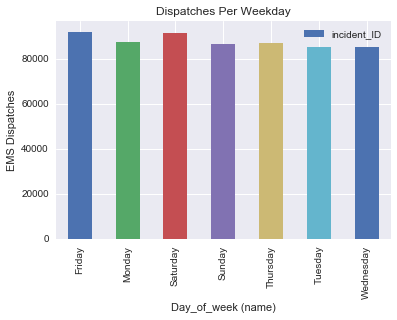

In [12]:
df_days.plot(x='Day_of_week (name)',y='incident_ID',kind='bar')
plt.ylabel('EMS Dispatches')
plt.title('Dispatches Per Weekday')
plt.show()

## Plot by grouped hours

In [13]:
df_hours = df.groupby('Hour (10-23)')[['incident_ID']].count().reset_index()

In [14]:
df_hours

,Hour (10-23),incident_ID
0,0,187533
1,1,426392


In [35]:
df_hours['Hour (0-23)'] = df_hours['Hour (10-23)'].astype(str)

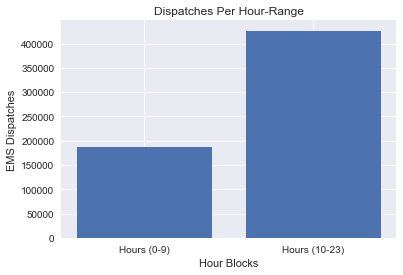

In [36]:
#df_hours.plot(kind='bar')
plt.bar(df_hours['Hour (10-23)'].astype(str),df_hours['incident_ID'])
plt.xlabel('Hour Blocks')
plt.ylabel('EMS Dispatches')
plt.title('Dispatches Per Hour-Range')
plt.xticks(np.arange(2),('Hours (0-9)','Hours (10-23)'))
plt.show()

## Plot dispatches that result in patient 